In [ ]:
# ==== Tahap 1: Import Library & Load Dataset ====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")




In [ ]:
# Load dataset langsung dari seaborn
df = sns.load_dataset('titanic')

print("===== DATASET HEAD =====")
print(df.head())
print("\n===== INFO DATASET =====")
print(df.info())

===== DATASET HEAD =====
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

===== INFO DATASET =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --

In [ ]:
import pandas as pd

# ========================================
# 3. HANDLING MISSING VALUES
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
# Fix for the TypeError: Add 'Unknown' to categories before filling NaN
df['deck'] = df['deck'].cat.add_categories("Unknown").fillna("Unknown")
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0]) # Fill missing values in embark_town

df = df.dropna(subset=['survived'])  # pastikan target tidak kosong

print("\nMissing Value After Cleaning:")
print(df.isnull().sum())


Missing Value After Cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


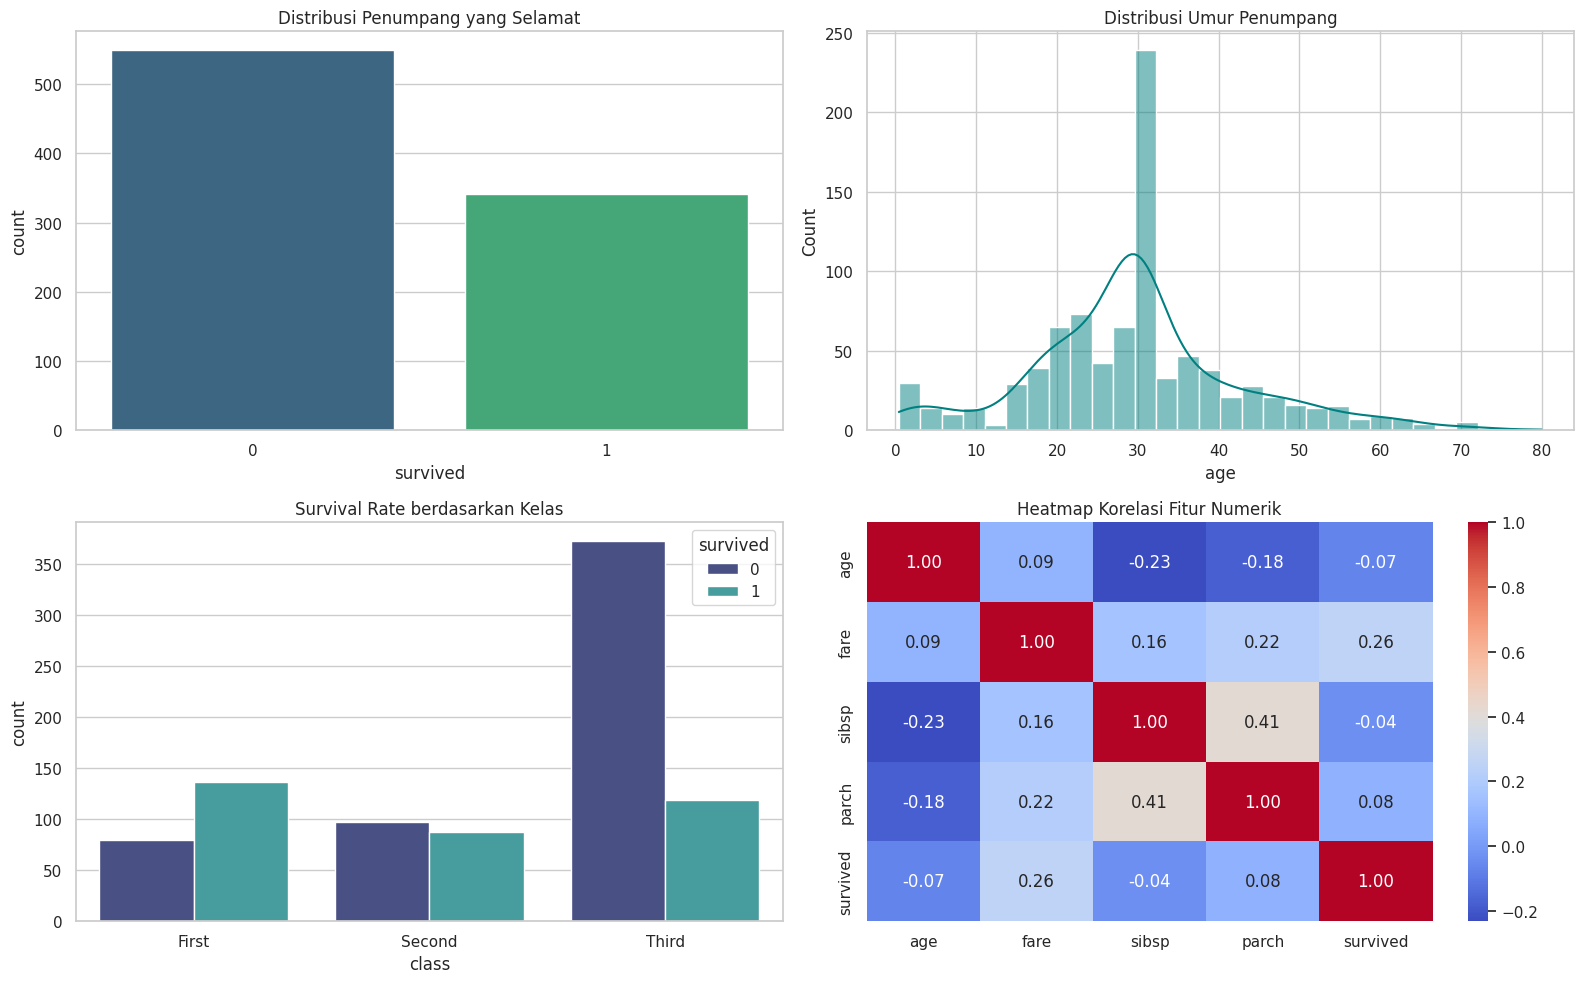

In [ ]:
# ========================================
# VISUALISASI EDA
# ========================================

plt.figure(figsize=(16,10))

# --- Grafik 1: Survived Countplot ---
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='survived', palette="viridis")
plt.title("Distribusi Penumpang yang Selamat")

# --- Grafik 2: Distribusi Umur ---
plt.subplot(2, 2, 2)
sns.histplot(df['age'], kde=True, color='teal')
plt.title("Distribusi Umur Penumpang")

# --- Grafik 3: Survival per Class ---
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='class', hue='survived', palette="mako")
plt.title("Survival Rate berdasarkan Kelas")

# --- Grafik 4: Heatmap Korelasi Numerik ---
plt.subplot(2, 2, 4)
sns.heatmap(df[['age','fare','sibsp','parch','survived']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")

plt.tight_layout()
plt.show()



===== PCA Explained Variance Ratio =====
[0.3435022  0.24284312 0.12654636]


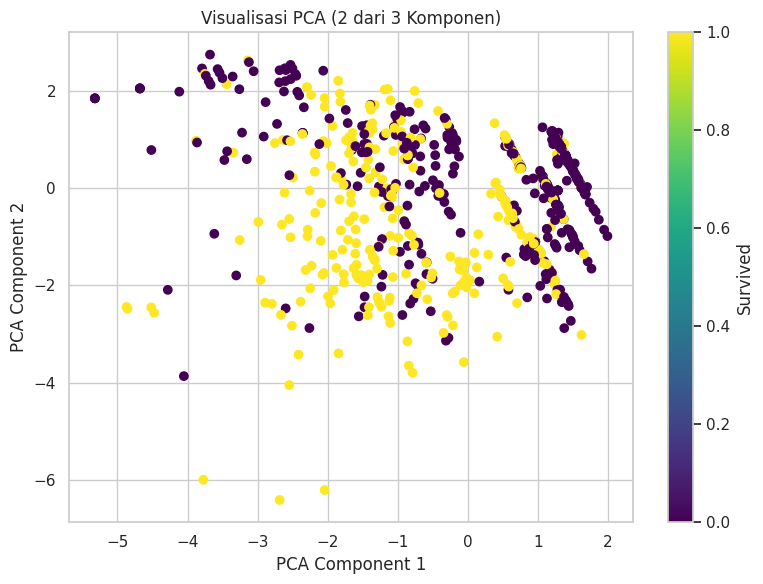

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ================== PCA (3 komponen) ==================
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'alone']
x = df[features].copy()
y = df['survived']

# --- Encoding kolom kategorikal ---
le = LabelEncoder()
x['sex'] = le.fit_transform(x['sex'])   # male=1, female=0 (biasanya)

# Standardisasi sebelum PCA
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(x_scaled)

print("\n===== PCA Explained Variance Ratio =====")
print(pca.explained_variance_ratio_)

# ================== PLOT 2 ==================
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Survived')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Visualisasi PCA (2 dari 3 Komponen)")
plt.tight_layout()
plt.show()



===== Random Forest Evaluation =====
Accuracy: 0.770949720670391
[[93 17]
 [24 45]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       110
           1       0.73      0.65      0.69        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179


===== Logistic Regression Evaluation =====
Accuracy: 0.7541899441340782
[[93 17]
 [27 42]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       110
           1       0.71      0.61      0.66        69

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179



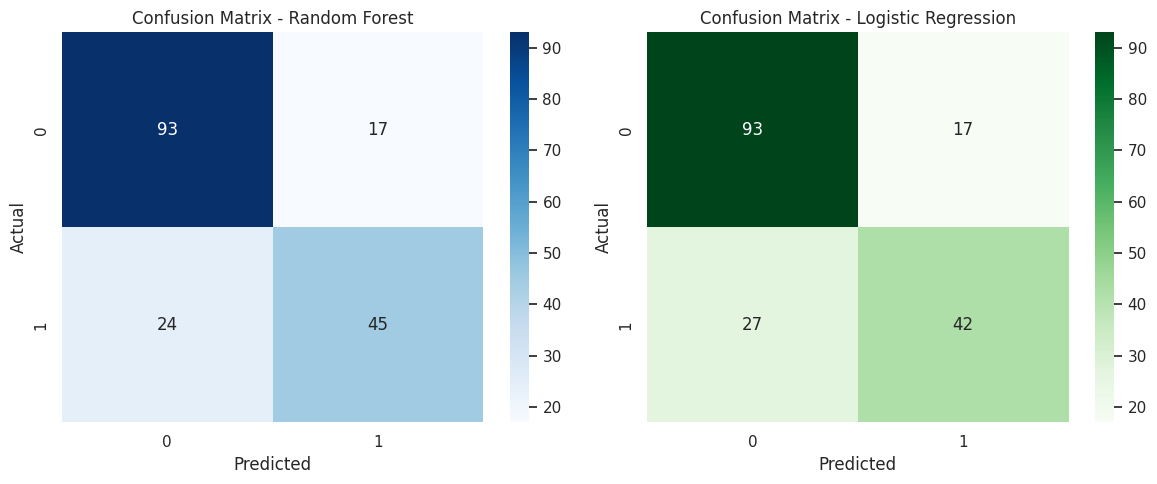

In [ ]:
# ==== Tahap 5: Evaluasi Model + Visualisasi CM ====

# Model Random Forest
model_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

print("\n===== Random Forest Evaluation =====")
print("Accuracy:", accuracy_score(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

# Model Logistic Regression
model_log = LogisticRegression(max_iter=2000, random_state=42)

print("\n===== Logistic Regression Evaluation =====")
print("Accuracy:", accuracy_score(y_test, pred_log))
print(confusion_matrix(y_test, pred_log))
print(classification_report(y_test, pred_log))


# === Tambahan: Visualisasi Confusion Matrix dalam satu gambar ===
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_rf = confusion_matrix(y_test, pred_rf)
cm_log = confusion_matrix(y_test, pred_log)

plt.figure(figsize=(12,5))

# ---- CM Random Forest ----
plt.subplot(1, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# ---- CM Logistic Regression ----
plt.subplot(1, 2, 2)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()